In [2]:
from src.TWIG_utils import *

In [3]:
client = RESTClient(auth_key="JeeOjlOPBe5aTiQ_Jb39raRqlam45uAO")

In [ ]:
stock_data = get_ticker_daily_data(client, ticker="EZPW", start="2018-01-01", end="2023-02-01")

In [4]:
stock_data.to_csv("ezpw_daily_stock_prices.csv")

In [5]:
import boto3

In [7]:
s3 = boto3.client('s3')

bucket_name = 'twig-stockdata'
file_name = 'ezpw_daily_stock_prices.csv'

In [13]:
response = s3.get_object(Bucket=bucket_name, Key=file_name)

stock_data = pd.read_csv(response['Body'])

stock_data.head()

,Unnamed: 0,date,open,close,high,low,ticker
0,0,2018-04-30,13.350,13.700,13.750,13.350,EZPW
1,1,2018-05-01,13.650,13.700,13.900,13.350,EZPW
2,2,2018-05-02,13.750,13.950,14.100,13.600,EZPW
3,3,2018-05-03,13.700,14.600,14.650,13.610,EZPW
4,4,2018-05-04,14.650,14.800,14.950,14.500,EZPW


In [10]:


# with open(file_name, 'rb') as f:
#     s3.upload_fileobj(f, bucket_name, file_name)

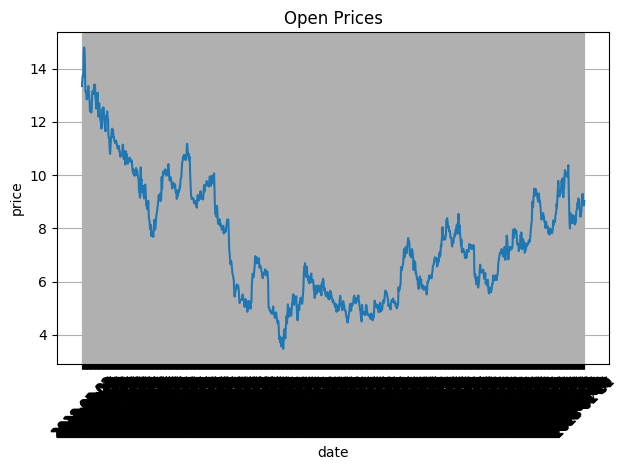

In [11]:
createPlot(xvalue=stock_data.date.values, yvalue=stock_data.open.values, xlabel="date", ylabel="price", title="Open Prices")